
# Project: Investigate Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> There many unknown facts in the world of soccer like is left-footed players are faster than right-footed or this is just a guess. In this project, I will try to see which attributes affect the speed of soccer players? is the preferred foot is relevant to speed or not? how height and weight can also affect the speed of all players using data


In [1]:
# import statements for all of the packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import sqlite3

<a id='wrangling'></a>
## Data Wrangling

> In this section, we try to load, prepare the data for Exploratory Data Analysis phase.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
con = sqlite3.connect("Soccerdatabase.sqlite")
Table = pd.read_sql_query("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", con)

#   types and look for instances of missing or possibly errant data.


In [3]:
print(Table)

    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Te

In [4]:
sqlite_sequence = pd.read_sql("""SELECT * FROM sqlite_sequence;""",con)
contries = pd.read_sql("""SELECT * FROM Country;""",con)
Players = pd.read_sql("""SELECT * FROM Player;""",con)
Matches = pd.read_sql("""SELECT * FROM Match;""",con)
Leagues = pd.read_sql("""SELECT * FROM League;""",con)
Team = pd.read_sql("""SELECT * FROM Team;""",con)
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes;""",con)
Team_Attributes = pd.read_sql("""SELECT * FROM Team_Attributes;""",con)
con.close()

### Exploring the data:
> Get to know the data before anything.

In [5]:
sqlite_sequence

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [6]:
#using head() to get the first 5 records
contries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [7]:
#using head() to get the first 5 records
Matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [8]:
#using head() to get the first 5 records
Leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [9]:
#using head() to get the first 5 records
Team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [10]:
#using head() to get the first 5 records
Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [11]:
#using head() to get the first 5 records
Players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [12]:
#using head() to get the first 5 records
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0



### Data Cleaning
> Now After knowing the data let's move to the cleaning part.

>It apears that there are only two tables(Player_Attributes & Players) I need for this investigation.

In [13]:
#using info() to know the columns and how many records
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [14]:
#using info() to know the columns and how many records
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [15]:
#using Merge to get all columns of the two tables
Speed_attributes =pd.merge(Players, Player_Attributes, on='player_api_id', how='left')

In [16]:
#using info() to know the columns and how many records
Speed_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 48 columns):
id_x                    183978 non-null int64
player_api_id           183978 non-null int64
player_name             183978 non-null object
player_fifa_api_id_x    183978 non-null int64
birthday                183978 non-null object
height                  183978 non-null float64
weight                  183978 non-null int64
id_y                    183978 non-null int64
player_fifa_api_id_y    183978 non-null int64
date                    183978 non-null object
overall_rating          183142 non-null float64
potential               183142 non-null float64
preferred_foot          183142 non-null object
attacking_work_rate     180748 non-null object
defensive_work_rate     183142 non-null object
crossing                183142 non-null float64
finishing               183142 non-null float64
heading_accuracy        183142 non-null float64
short_passing           183142 non-null flo

For the analysis these are the attribute I need: 
> player_api_id, player_name, birthday, height, weight, date, preferred_foot, acceleration, sprint_speed, balance, jumping, stamina

These attribute are chosen because I need all attributes that are relevent to speed.

In [17]:
#restruct the data frame
Speed_attributes = Speed_attributes[['player_api_id','player_name','birthday','height','weight'
,'date','preferred_foot','acceleration','sprint_speed','balance','jumping','stamina']]

In [18]:
Speed_attributes.dtypes

player_api_id       int64
player_name        object
birthday           object
height            float64
weight              int64
date               object
preferred_foot     object
acceleration      float64
sprint_speed      float64
balance           float64
jumping           float64
stamina           float64
dtype: object

In [19]:
#Changing date typr from object to datetime
Speed_attributes.date = pd.to_datetime(Speed_attributes.date)
Speed_attributes.birthday = pd.to_datetime(Speed_attributes.birthday)

In [20]:
Speed_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 12 columns):
player_api_id     183978 non-null int64
player_name       183978 non-null object
birthday          183978 non-null datetime64[ns]
height            183978 non-null float64
weight            183978 non-null int64
date              183978 non-null datetime64[ns]
preferred_foot    183142 non-null object
acceleration      183142 non-null float64
sprint_speed      183142 non-null float64
balance           181265 non-null float64
jumping           181265 non-null float64
stamina           183142 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 18.2+ MB


In [21]:
#Knowing how many players
Speed_attributes.player_api_id.nunique()

11060

In [22]:
#The nature of the data represnet the stats of the player for each match he played.
# Therefore chosing the mean for each players seems fair and suitable for this analysis.
mean_attributes = Speed_attributes.groupby(['player_api_id']).mean()

In [23]:
# In the prefered_foot analysis we will try to get one record per player[Id, prefered foot, mean sprint speed]:
#First Group By id and choose first record so it will be one record per player.
prefered_foot_speed=Speed_attributes[['player_api_id','preferred_foot']].groupby(['player_api_id']).first()
#Then get the mean speed for each player from mean_attributes data frame. 
prefered_foot_speed = pd.merge(prefered_foot_speed, mean_attributes[['sprint_speed']], on='player_api_id', how='left')

In [24]:
prefered_foot_speed.head()

,preferred_foot,sprint_speed
player_api_id,,
2625,right,63.285714
2752,right,42.190476
2768,left,58.904762
2770,right,59.800000
2790,left,71.200000


In [25]:
#drop null values if any.
prefered_foot_speed= prefered_foot_speed.dropna()
mean_attributes= mean_attributes.dropna()

In [26]:
prefered_foot_speed.shape

(11060, 2)

In [27]:
mean_attributes.shape

(10582, 7)

> Now the data is readey for analysis.

<a id='eda'></a>
## Exploratory Data Analysis




In [28]:
#brief description of the data using the function describe()
mean_attributes.describe()

,height,weight,acceleration,sprint_speed,balance,jumping,stamina
count,10582.000000,10582.00000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,181.889395,168.40257,66.509258,66.895286,64.475483,66.038401,65.423695
std,6.387826,15.02420,11.674413,11.272219,11.262084,9.555293,11.334359
min,157.480000,117.00000,15.000000,17.000000,20.000000,21.000000,16.000000
25%,177.800000,159.00000,60.000000,61.000000,58.157895,60.000000,60.074786
50%,182.880000,168.00000,68.000000,68.250000,65.666667,66.888889,67.138095
75%,185.420000,179.00000,74.555556,74.666667,72.000000,72.363636,72.857143
max,208.280000,243.00000,95.787879,95.696970,94.312500,94.311111,93.181818


>Corrolation is important to determine how varibles affect each other. In this analysis, I will try the three method of corrolation(pearson, spearman, kendall) to see how they affect each other.

In [29]:
mean_attributes.corr(method ='pearson')

,height,weight,acceleration,sprint_speed,balance,jumping,stamina
height,1.000000,0.766881,-0.567045,-0.478615,-0.735321,0.000628,-0.260431
weight,0.766881,1.000000,-0.507772,-0.433273,-0.611256,0.047493,-0.223456
acceleration,-0.567045,-0.507772,1.000000,0.926503,0.668894,0.134876,0.525495
sprint_speed,-0.478615,-0.433273,0.926503,1.000000,0.597724,0.157517,0.557732
balance,-0.735321,-0.611256,0.668894,0.597724,1.000000,0.152949,0.431649
jumping,0.000628,0.047493,0.134876,0.157517,0.152949,1.000000,0.262709
stamina,-0.260431,-0.223456,0.525495,0.557732,0.431649,0.262709,1.000000


In [30]:
mean_attributes.corr(method ='spearman')

,height,weight,acceleration,sprint_speed,balance,jumping,stamina
height,1.000000,0.763948,-0.555155,-0.454110,-0.731877,0.039845,-0.191767
weight,0.763948,1.000000,-0.502017,-0.416393,-0.608828,0.074218,-0.167317
acceleration,-0.555155,-0.502017,1.000000,0.918277,0.628845,0.099015,0.404793
sprint_speed,-0.454110,-0.416393,0.918277,1.000000,0.542441,0.126025,0.432481
balance,-0.731877,-0.608828,0.628845,0.542441,1.000000,0.116562,0.342413
jumping,0.039845,0.074218,0.099015,0.126025,0.116562,1.000000,0.269894
stamina,-0.191767,-0.167317,0.404793,0.432481,0.342413,0.269894,1.000000


In [31]:
mean_attributes.corr(method ='kendall')

,height,weight,acceleration,sprint_speed,balance,jumping,stamina
height,1.000000,0.592469,-0.395376,-0.318055,-0.560418,0.027923,-0.130422
weight,0.592469,1.000000,-0.355148,-0.290702,-0.446046,0.051563,-0.113829
acceleration,-0.395376,-0.355148,1.000000,0.759235,0.453424,0.066909,0.281475
sprint_speed,-0.318055,-0.290702,0.759235,1.000000,0.383447,0.085381,0.302130
balance,-0.560418,-0.446046,0.453424,0.383447,1.000000,0.079079,0.236143
jumping,0.027923,0.051563,0.066909,0.085381,0.079079,1.000000,0.182899
stamina,-0.130422,-0.113829,0.281475,0.302130,0.236143,0.182899,1.000000


### Research Question 1: Does height affect the speed of the players ?

>We learned that corrolation between height and sprint speed by Method:
>pearson:  -0.472263
>spearman: -0.446678
>kendall:  -0.312688

>However we need a scatter plot visual to see and do further more investigation.

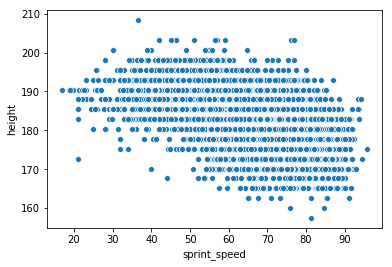

In [32]:
# Using Seaborn for visulization.
#Scatter plot is good for represnting corrolations.
ax = sns.scatterplot(x="sprint_speed", y="height",
                     data=mean_attributes)

> The visual indicates that sprint speed is negatively correlated to height
the taller you are the more chance to be slower.


>However the affect is not very significant.


### Research Question 2:  Are left-footed players much faaster than right-footed players? 

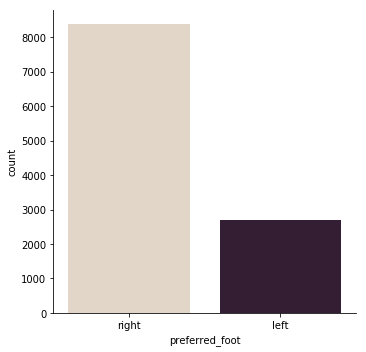

In [33]:
# Using Seaborn for visulization.
#bar chart is good to show the count of players per catogery(preferred foot)
sns.catplot(x="preferred_foot", kind="count", palette="ch:.25", data=prefered_foot_speed);

> most of the players are right-footed so we should get much more variations from right-footed data than left-footed data.

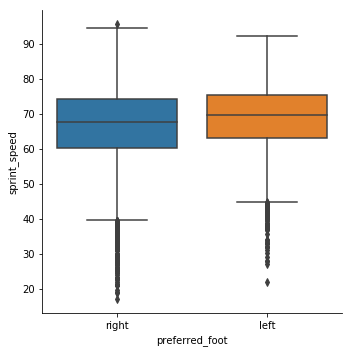

In [34]:
# Using Seaborn for visulization.
#the boxplot is the best visual for this analysis as it shows quartiles and outliars
sns.catplot(x="preferred_foot", y="sprint_speed",  kind="box",data=prefered_foot_speed);

> it looks like left-footed players are kind of faster than left-footed players. However, there more variations from right-footed players as mentioned before.
Outliares below 40 are mostly goalkeepers.


<a id='conclusions'></a>
## Conclusions



>Overall, there many attributes that affect sprint speed of players. Height and prefered foot might affect the speed but they are not conclusive. The tall players tend to be slower than shorter players. Also, left-footed players are likely to be faster for some reasons but it is not a major factor.